In [1]:
from graphviz import Digraph
import sys
from autograd import Value


In [2]:
def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v is not None and v not in nodes:
            nodes.add(v)
            if v.leftChild is not None:
                edges.add((v.leftChild, v))
                build(v.leftChild)
            if v.rightChild is not None:
                edges.add((v.rightChild, v))
                build(v.rightChild)
    
    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})
    
    # Create nodes in the dot graph
    for n in nodes:
        # Create the main node for Value
        dot.node(name=str(id(n)), label="{ data %.4f | grad %.4f }" % (n.value, n.gradient), shape='record')
        # If this node is the result of an operation, create an op node as well.
        if n.operator is not None:
            op_node = str(id(n)) + n.operator
            dot.node(name=op_node, label=n.operator)
            dot.edge(op_node, str(id(n)))
    
    # Create edges between nodes
    for n1, n2 in edges:
        if n2.operator is not None:
            dot.edge(str(id(n1)), str(id(n2)) + n2.operator)
        else:
            dot.edge(str(id(n1)), str(id(n2)))
    
    return dot



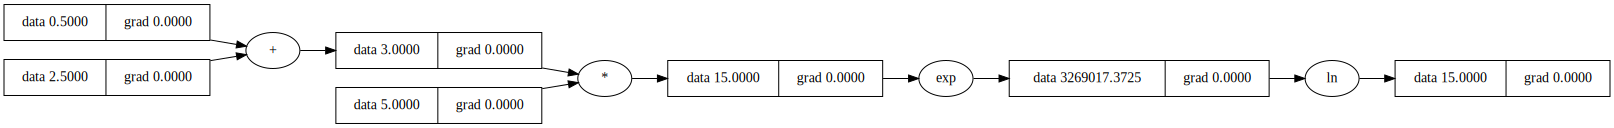

In [ ]:
a = Value(0.5)
b = Value(2.5)
c = Value(5)
a_plus_b = a + b

inner = (a + b) * c
outer = inner.exp()
outer2 = outer.ln()

draw_dot(outer2)

In [4]:
outer2.backward()

AttributeError: 'Value' object has no attribute '_gradient'